<a href="https://colab.research.google.com/github/ldennis1/BSAN6070--CA05/blob/main/CA05_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [ ]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  #package for endocing
from sklearn.preprocessing import LabelEncoder
  #package for training and testing data  
from sklearn.model_selection import train_test_split
  #package for implementing LR model 
from sklearn.linear_model import LogisticRegression
  #packages for model evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [ ]:
#read in cardiovascular disease data 
cardiodis = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

Exploratory Data Analysis 

In [ ]:
cardiodis.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [ ]:
cardiodis.tail()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [ ]:
cardiodis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [ ]:
cardiodis.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [ ]:
cardiodis.groupby('cvd_4types').mean()

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,,,,,,,,,,,,,,,,
0,63.716328,1.156509,2.281415,1.454477,105.176915,37.050640,93.896892,82.393980,12.005719,0.473288,0.287434,0.045147,2.481565,2.319037,4.265613,3.957863
1,65.601673,1.051751,2.357554,1.308939,105.563170,37.898134,99.511521,83.329378,13.528071,0.401464,0.355985,0.083116,2.468374,2.255097,4.311553,3.800314


In [ ]:
#Do we have a balanced dataset? Do we have to balance?
#1 = risk present; 0 = risk not present 
cardiodis.cvd_4types.value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

Split data into train and test 

In [ ]:
#obtain column names for ease
cardiodis.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [ ]:
#x variable will represent our independents vars
#y variable will be our dependent var => what we are trying to predict 

x = cardiodis[['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25']]
y = cardiodis['cvd_4types']

In [ ]:
#split into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
#implement model 
model = LogisticRegression(penalty = 'l2', solver='liblinear', C=1, random_state=101)
fit_model = model.fit(x_train, y_train)
y_pred = fit_model.predict(x_test)

## Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [ ]:
feature_importance=pd.DataFrame({'feature':list(x_train.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
1,race,0.883611
15,hlthlm25,0.561437
11,parrptdiab,0.541506
2,educat,0.310915
14,tired25,0.126422
3,mstat,0.122914
12,bend25,0.116301
10,srhype,0.105461
6,waist,0.073628
13,happy25,0.051989


Most impactful features are race, hlthlm25 (frequency that physical health or emotional problems interefered with normal social activities) and parrptdiab (history of diabetes). 

# Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

Accuracy: 0.6916752312435765
Confusion Matrix:
[[204 211]
 [ 89 469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58       415
           1       0.69      0.84      0.76       558

    accuracy                           0.69       973
   macro avg       0.69      0.67      0.67       973
weighted avg       0.69      0.69      0.68       973

AUC Score: 0.6660340285874682
ROC Curve:


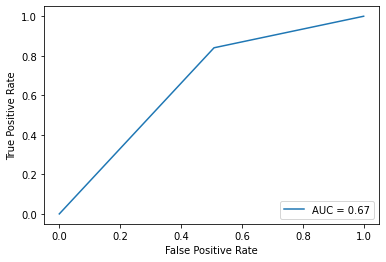

In [ ]:
#Accuracy Score
print("Accuracy:",accuracy_score(y_test, y_pred))

#Confusion Matrix
print("Confusion Matrix:")
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

#F1-Score, Precision, & Recall
print("Classification Report:")
print(classification_report(y_test, y_pred))

#AUC Score
print('AUC Score:', roc_auc_score(y_test, y_pred))

#display ROC curve visualization with AUC score 
print("ROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
 
roc_auc = roc_auc_score(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()